Cropped image shape: (80, 100, 204)
Number of bands in cropped image: 204
Band 0 mean value: 0.25238892436027527
Band 1 mean value: 0.21930918097496033
Band 2 mean value: 0.1951802521944046
Band 3 mean value: 0.17408786714076996
Band 4 mean value: 0.1645834594964981
Band 5 mean value: 0.15200209617614746
Band 6 mean value: 0.1436348855495453
Band 7 mean value: 0.13692311942577362
Band 8 mean value: 0.13209079205989838
Band 9 mean value: 0.12924616038799286
Band 10 mean value: 0.12618225812911987
Band 11 mean value: 0.12302827090024948
Band 12 mean value: 0.12094610929489136
Band 13 mean value: 0.11828669905662537
Band 14 mean value: 0.11688288301229477
Band 15 mean value: 0.11562380194664001
Band 16 mean value: 0.11373782157897949
Band 17 mean value: 0.11290638148784637
Band 18 mean value: 0.11235398799180984
Band 19 mean value: 0.11168798059225082
Band 20 mean value: 0.1112738624215126
Band 21 mean value: 0.11111904680728912
Band 22 mean value: 0.11092904955148697
Band 23 mean value: 

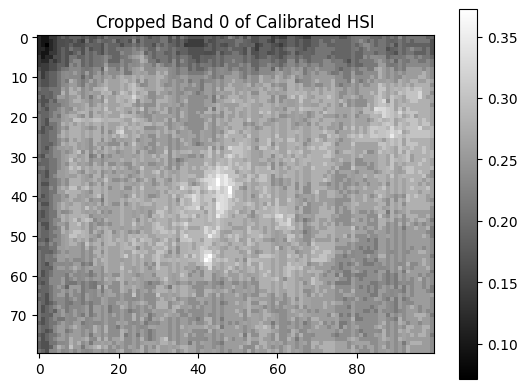

In [8]:
#*****************************************************************************************************************************
#*****************************************************************************************************************************
import numpy as np
! pip install spectral
import matplotlib.pyplot as plt
from spectral import envi

# Load the hyperspectral image and reference images
SCraw = envi.open('D:/OneDrive/Desktop/HSI/Grape_HSI/Dataset/Grapes_HSI/2130/capture/2130.hdr', 'D:/OneDrive/Desktop/HSI/Grape_HSI/Dataset/Grapes_HSI/2130/capture/2130.raw')

# Open the white and dark reference images
white_reference = envi.open('D:/OneDrive/Desktop/HSI/Grape_HSI/Dataset/Grapes_HSI/2130/capture/WHITEREF_2130.hdr', image='D:/OneDrive/Desktop/HSI/Grape_HSI/Dataset/Grapes_HSI/2130/capture/WHITEREF_2130.raw')
dark_reference = envi.open('D:/OneDrive/Desktop/HSI/Grape_HSI/Dataset/Grapes_HSI/2130/capture/DARKREF_2130.hdr', image='D:/OneDrive/Desktop/HSI/Grape_HSI/Dataset/Grapes_HSI/2130/capture/DARKREF_2130.raw')

# Read the raw data and references as NumPy arrays
raw_data = SCraw.load()
white_data = white_reference.load()
dark_data = dark_reference.load()

# Subtract dark reference from raw image
calibrated_data = raw_data - dark_data

# Subtract dark reference from white reference
normalized_white = white_data - dark_data

# Divide calibrated image by normalized white reference
calibrated_data /= normalized_white

# Function to crop hyperspectral image
def crop_hsi_image(hsi_image, x, y, width, height):
    """
    Crop the hyperspectral image.

    :param hsi_image: Input hyperspectral image (height x width x bands).
    :param x: Starting x coordinate of the crop region.
    :param y: Starting y coordinate of the crop region.
    :param width: Width of the crop region.
    :param height: Height of the crop region.
    :return: Cropped hyperspectral image.
    """
    # Validate input
    if x < 0 or y < 0 or width <= 0 or height <= 0:
        raise ValueError("Invalid crop parameters.")

    # Ensure cropping coordinates are within the image dimensions
    img_height, img_width, num_bands = hsi_image.shape
    x_end = min(x + width, img_width)
    y_end = min(y + height, img_height)

    # Crop the image
    cropped_image = hsi_image[y:y_end, x:x_end, :]

    return cropped_image

# Example coordinates and dimensions for cropping
x_start = 50
y_start = 30
crop_width = 100
crop_height = 80

# Crop the calibrated hyperspectral image
cropped_calibrated_data = crop_hsi_image(calibrated_data, x_start, y_start, crop_width, crop_height)

# Print information about the cropped image
print(f"Cropped image shape: {cropped_calibrated_data.shape}")
print(f"Number of bands in cropped image: {cropped_calibrated_data.shape[2]}")

# Print pixel values of each band in the cropped image (as an example, printing the mean value of each band)
for i in range(cropped_calibrated_data.shape[2]):
    band_data = cropped_calibrated_data[:, :, i]
    mean_value = np.mean(band_data)
    print(f"Band {i} mean value: {mean_value}")

# Optionally, display one of the bands from the cropped image (e.g., the 0th band)
plt.imshow(cropped_calibrated_data[:, :, 0], cmap='gray')
plt.title('Cropped Band 0 of Calibrated HSI')
plt.colorbar()
plt.show()

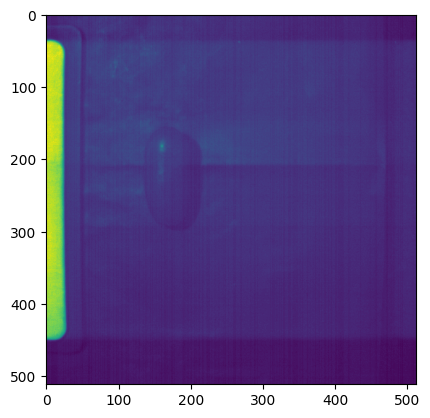

In [ ]:
#*****************************************************************************************************************************
#*****************************************************************************************************************************
plt.imshow(calibrated_data[:,:,1])

In [ ]:
#*****************************************************************************************************************************
#*****************************************************************************************************************************
calibrated_data.shape

(512, 512, 204)

In [ ]:
#*****************************************************************************************************************************
#*****************************************************************************************************************************
# Define crop coordinates
x_start, x_end = 150, 300
y_start, y_end = 120, 230

# Crop the HSI image
cropped_hsi = calibrated_data[x_start:x_end, y_start:y_end, :]

print("Cropped HSI shape:", cropped_hsi.shape)

Cropped HSI shape: (150, 110, 204)


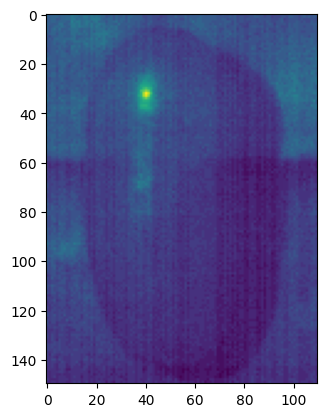

In [ ]:
#*****************************************************************************************************************************
#*****************************************************************************************************************************
plt.imshow(cropped_hsi[:,:,1])

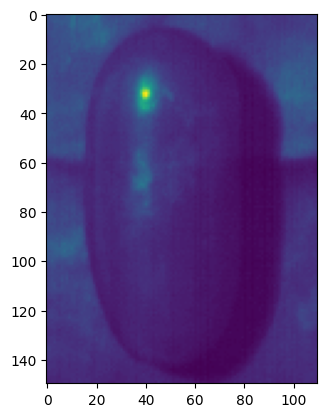

In [ ]:
#*****************************************************************************************************************************
#*****************************************************************************************************************************
plt.imshow(cropped_hsi[:,:,10])

In [ ]:
#*****************************************************************************************************************************
#*****************************************************************************************************************************
import numpy as np

# Rotate the cropped image by 90 degrees
rotated_90 = np.rot90(cropped_hsi, k=1, axes=(0, 1))

# Rotate the cropped image by 180 degrees
rotated_180 = np.rot90(cropped_hsi, k=2, axes=(0, 1))

# Rotate the cropped image by 270 degrees
rotated_270 = np.rot90(cropped_hsi, k=3, axes=(0, 1))

# Print the shapes to confirm
print("Original shape:", cropped_hsi.shape)
print("90 degrees rotated shape:", rotated_90.shape)
print("180 degrees rotated shape:", rotated_180.shape)
print("270 degrees rotated shape:", rotated_270.shape)

Original shape: (150, 110, 204)
90 degrees rotated shape: (110, 150, 204)
180 degrees rotated shape: (150, 110, 204)
270 degrees rotated shape: (110, 150, 204)


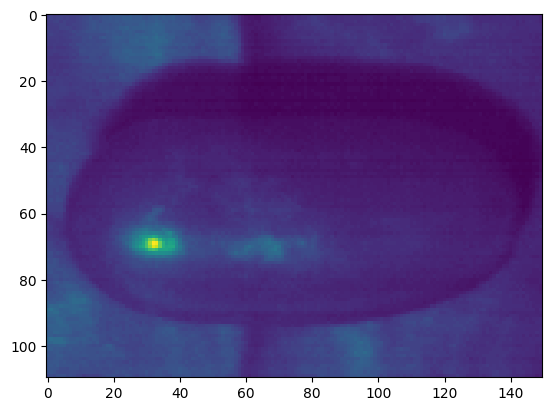

In [ ]:
#*****************************************************************************************************************************
#*****************************************************************************************************************************
plt.imshow(rotated_90[:,:,10])

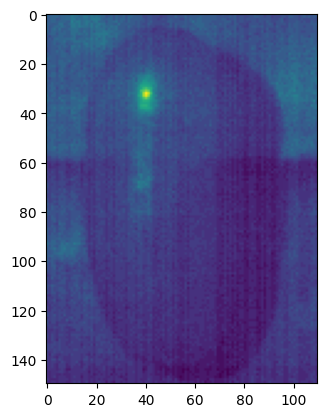

In [ ]:
#*****************************************************************************************************************************
#*****************************************************************************************************************************
plt.imshow(cropped_hsi[:,:,1])

In [ ]:
#*****************************************************************************************************************************
#*****************************************************************************************************************************
import os
import numpy as np

# Define folder paths for the cropped and rotated images
output_folders = {
    'cropped': 'output/cropped_image',
    '90_degrees': 'output/90_degrees_rotation',
    '180_degrees': 'output/180_degrees_rotation',
    '270_degrees': 'output/270_degrees_rotation'
}

# Create the folders if they don't already exist
for folder in output_folders.values():
    os.makedirs(folder, exist_ok=True)

# Save the cropped image as a .npy file
np.save(os.path.join(output_folders['cropped'], 'cropped_image.npy'), cropped_hsi)

# Save each rotated HSI image as a .npy file
np.save(os.path.join(output_folders['90_degrees'], 'rotated_90.npy'), rotated_90)
np.save(os.path.join(output_folders['180_degrees'], 'rotated_180.npy'), rotated_180)
np.save(os.path.join(output_folders['270_degrees'], 'rotated_270.npy'), rotated_270)

print("Cropped and rotated HSI images saved successfully.")

Cropped and rotated HSI images saved successfully.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import os
from sklearn.model_selection import train_test_split

# Path to the dataset root folder containing subfolders "class1", ..., "class8"
dataset_path = "D:\OneDrive\Desktop\HSI\Grape_HSI\Dataset\Cropped Images\Augmented"

# Image dimensions and number of bands in each hyperspectral image
img_height, img_width = 128, 128  # Adjust based on your dataset
num_bands = 204  # Adjust according to the number of spectral bands in your HSI data

# Batch size and number of classes
batch_size = 4
num_classes = 2

# Load and preprocess the dataset
def load_hsi_images(path, img_height, img_width, num_bands):
    images, labels = [], []

    for class_idx in range(1, num_classes + 1):
        class_folder = os.path.join(path, f"class{class_idx}")

        for img_file in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_file)
            image = np.load(img_path)  # Assuming each HSI is stored as a .npy file

            # Resize and add to lists
            image_resized = tf.image.resize(image, (img_height, img_width)).numpy()
            images.append(image_resized)
            labels.append(class_idx - 1)  # Class labels 0 through 7

    images = np.array(images)
    labels = np.array(labels)
    return images, labels

# Load the dataset
X, y = load_hsi_images(dataset_path, img_height, img_width, num_bands)

# Normalize and split the dataset
X = X / 255.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, num_bands)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=batch_size, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")

<>:8: SyntaxWarning: invalid escape sequence '\O'
<>:8: SyntaxWarning: invalid escape sequence '\O'
C:\Users\dell\AppData\Local\Temp\ipykernel_6568\3853155826.py:8: SyntaxWarning: invalid escape sequence '\O'
  dataset_path = "D:\OneDrive\Desktop\HSI\Grape_HSI\Dataset\Cropped Images\Augmented"
C:\Users\dell\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 562ms/step - accuracy: 0.5336 - loss: 261.8433 - val_accuracy: 0.4500 - val_loss: 24.1274
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 317ms/step - accuracy: 0.6253 - loss: 8.8194 - val_accuracy: 0.5500 - val_loss: 1.9142
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 237ms/step - accuracy: 0.6276 - loss: 1.4224 - val_accuracy: 0.5000 - val_loss: 0.8745
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 319ms/step - accuracy: 0.6236 - loss: 0.6685 - val_accuracy: 0.5000 - val_loss: 0.9138
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 235ms/step - accuracy: 0.5838 - loss: 0.6509 - val_accuracy: 0.4000 - val_loss: 1.0805
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 231ms/step - accuracy: 0.8778 - loss: 0.5283 - val_accuracy: 0.4500 - val_loss: 1.3799
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 257ms/step - accuracy: 0.7236 - loss: 0.7478 - val_accuracy: 0.6000 - val_loss: 0.6972
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 234ms/step - accuracy: 0.6299 - loss: 0.5946 - val_accuracy

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


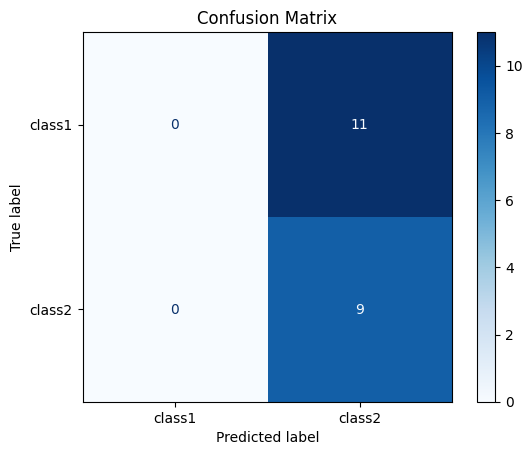

In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt

# Get predictions for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
display_labels = [f"class{i+1}" for i in unique_labels(y_test, y_pred_classes)]

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [4]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print(f"Precision (weighted): {precision:.2f}")
print(f"Recall (weighted): {recall:.2f}")
print(f"F1 Score (weighted): {f1:.2f}")


Precision (weighted): 0.20
Recall (weighted): 0.45
F1 Score (weighted): 0.28


C:\Users\dell\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import os
from sklearn.model_selection import train_test_split

# Path to the dataset root folder containing subfolders "class1", ..., "class8"
dataset_path = "D:\OneDrive\Desktop\HSI\Grape_HSI\Dataset\Cropped Images\Augmented"

# Image dimensions and number of bands in each hyperspectral image
img_height, img_width = 128, 128  # Adjust based on your dataset
num_bands = 204  # Adjust according to the number of spectral bands in your HSI data

# Batch size and number of classes
batch_size = 4
num_classes = 2

# Load and preprocess the dataset
def load_hsi_images(path, img_height, img_width, num_bands):
    images, labels = [], []

    for class_idx in range(1, num_classes + 1):
        class_folder = os.path.join(path, f"class{class_idx}")

        for img_file in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_file)
            image = np.load(img_path)  # Assuming each HSI is stored as a .npy file

            # Resize and add to lists
            image_resized = tf.image.resize(image, (img_height, img_width)).numpy()
            images.append(image_resized)
            labels.append(class_idx - 1)  # Class labels 0 through 7

    images = np.array(images)
    labels = np.array(labels)
    return images, labels

# Load the dataset
X, y = load_hsi_images(dataset_path, img_height, img_width, num_bands)

# Normalize and split the dataset
X = X / 255.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, num_bands)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=batch_size, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")

<>:8: SyntaxWarning: invalid escape sequence '\O'
<>:8: SyntaxWarning: invalid escape sequence '\O'
C:\Users\dell\AppData\Local\Temp\ipykernel_6568\2437593542.py:8: SyntaxWarning: invalid escape sequence '\O'
  dataset_path = "D:\OneDrive\Desktop\HSI\Grape_HSI\Dataset\Cropped Images\Augmented"


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 258ms/step - accuracy: 0.5914 - loss: 423.9315 - val_accuracy: 0.4500 - val_loss: 12.1750
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 486ms/step - accuracy: 0.4101 - loss: 5.4721 - val_accuracy: 0.5500 - val_loss: 0.8596
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 173ms/step - accuracy: 0.5028 - loss: 1.4141 - val_accuracy: 0.4500 - val_loss: 1.1625
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 171ms/step - accuracy: 0.5677 - loss: 0.8462 - val_accuracy: 0.5500 - val_loss: 1.2156
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 187ms/step - accuracy: 0.6087 - loss: 0.8059 - val_accuracy: 0.5500 - val_loss: 1.0806
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 183ms/step - accuracy: 0.4805 - loss: 1.0407 - val_accuracy: 0.4500 - val_loss: 0.8701
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 200ms/step - accuracy: 0.6128 - loss: 0.5766 - val_accuracy: 0.4500 - val_loss: 0.7227
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 194ms/step - accuracy: 0.8148 - loss: 0.4345 - val_accuracy:

<>:12: SyntaxWarning: invalid escape sequence '\O'
<>:12: SyntaxWarning: invalid escape sequence '\O'
C:\Users\dell\AppData\Local\Temp\ipykernel_8052\3473226413.py:12: SyntaxWarning: invalid escape sequence '\O'
  dataset_path = "D:\OneDrive\Desktop\HSI\Grape_HSI\Dataset\Cropped Images\Augmented"


Test accuracy: 0.45


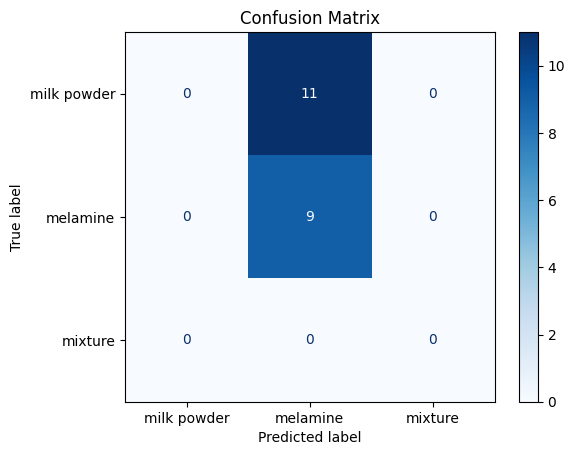

C:\Users\dell\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision: 0.20
Recall: 0.45
F1 Score: 0.28
Training accuracy: 1.00


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import os
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf

# Path to the dataset root folder containing subfolders "class1", ..., "class8"
dataset_path = "D:\OneDrive\Desktop\HSI\Grape_HSI\Dataset\Cropped Images\Augmented"

# Image dimensions and number of bands in each hyperspectral image
img_height, img_width = 128, 128  # Adjust based on your dataset
num_bands = 204  # Adjust according to the number of spectral bands in your HSI data

# Batch size and number of classes
batch_size = 4
num_classes = 2

# Load and preprocess the dataset
def load_hsi_images(path, img_height, img_width, num_bands):
    images, labels = [], []

    for class_idx in range(1, num_classes + 1):
        class_folder = os.path.join(path, f"class{class_idx}")

        for img_file in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_file)
            image = np.load(img_path)  # Assuming each HSI is stored as a .npy file

            # Resize and add to lists
            image_resized = tf.image.resize(image, (img_height, img_width)).numpy()
            images.append(image_resized)
            labels.append(class_idx - 1)  # Class labels 0 through 7

    images = np.array(images)
    labels = np.array(labels)
    return images, labels

# Load the dataset
X, y = load_hsi_images(dataset_path, img_height, img_width, num_bands)

# Normalize and split the dataset
X = X / 255.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Flatten the images for SVM input (SVM expects a 2D array)
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Initialize the SVM model
svm_model = SVC(kernel='rbf', C=1, gamma='scale')  # Using RBF kernel

# Train the SVM model
svm_model.fit(X_train_flattened, y_train)

# Evaluate the model
y_pred = svm_model.predict(X_test_flattened)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.2f}")

In [ ]:
#*****************************************************************************************************************************
#*****************************************************************************************************************************
import os
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# ----- Load the HSI Dataset -----
def load_hsi_images(path, num_classes):
    images, labels = [], []

    for class_idx in range(1, num_classes + 1):
        class_folder = os.path.join(path, f"class{class_idx}")

        for img_file in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_file)
            image = np.load(img_path)  # Assuming HSI stored as .npy file

            images.append(image)
            labels.append(class_idx - 1)  # Labels start at 0

    images = np.array(images)
    labels = np.array(labels)
    return images, labels


# Paths and Parameters
dataset_path = "D:/OneDrive/Desktop/HSI/Grape_HSI/Dataset/Cropped Images/Augmented"
num_classes = 2
img_height, img_width, num_bands = 128, 128, 204

# Load dataset
X, y = load_hsi_images(dataset_path, num_classes)

# Normalize the data
X = X / np.max(X)

# Reshape for PCA (flatten each image)
num_samples = X.shape[0]
X_flattened = X.reshape(num_samples, -1)  # Shape: (num_samples, img_height*img_width*num_bands)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_flattened, y, test_size=0.25, random_state=42)

# ----- Apply PCA -----
n_components = 50  # Reduce to 50 dimensions
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# ----- KNN Classification -----
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)

# Predictions
y_pred = knn.predict(X_test_pca)

# Accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.4f}")

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (80,) + inhomogeneous part.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import os
from sklearn.model_selection import train_test_split

# Path to the dataset root folder containing subfolders "class1", ..., "class8"
dataset_path = "D:\OneDrive\Desktop\HSI\Grape_HSI\Dataset\Cropped Images\Augmented"

# Image dimensions and number of bands in each hyperspectral image
img_height, img_width = 128, 128  # Adjust based on your dataset
num_bands = 204  # Adjust according to the number of spectral bands in your HSI data

# Batch size and number of classes
batch_size = 16
num_classes = 2

# Load and preprocess the dataset
def load_hsi_images(path, img_height, img_width, num_bands):
    images, labels = [], []

    for class_idx in range(1, num_classes + 1):
        class_folder = os.path.join(path, f"class{class_idx}")

        for img_file in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_file)
            image = np.load(img_path)  # Assuming each HSI is stored as a .npy file

            # Resize and add to lists
            image_resized = tf.image.resize(image, (img_height, img_width)).numpy()
            images.append(image_resized)
            labels.append(class_idx - 1)  # Class labels 0 through 7

    images = np.array(images)
    labels = np.array(labels)
    return images, labels

# Load the dataset
X, y = load_hsi_images(dataset_path, img_height, img_width, num_bands)

# Normalize and split the dataset
X = X / 255.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 3D CNN Model for HSI
model = models.Sequential([
    layers.Conv3D(32, (3, 3, 7), activation='relu', input_shape=(img_height, img_width, num_bands, 1)),
    layers.MaxPooling3D((2, 2, 2)),

    layers.Conv3D(64, (3, 3, 5), activation='relu'),
    layers.MaxPooling3D((2, 2, 2)),

    layers.Conv3D(128, (3, 3, 3), activation='relu'),
    layers.MaxPooling3D((2, 2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])


# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=batch_size, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")

<>:8: SyntaxWarning: invalid escape sequence '\O'
<>:8: SyntaxWarning: invalid escape sequence '\O'
C:\Users\dell\AppData\Local\Temp\ipykernel_7700\123250067.py:8: SyntaxWarning: invalid escape sequence '\O'
  dataset_path = "D:\OneDrive\Desktop\HSI\Grape_HSI\Dataset\Cropped Images\Augmented"
C:\Users\dell\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/50
1/4 ━━━━━━━━━━━━━━━━━━━━ 9:30 190s/step - accuracy: 0.5000 - loss: 14.2578

In [6]:
def count_images_in_folder(folder_path):
    """Count the number of .npy images in each class folder."""
    class_counts = {}
    
    for class_name in os.listdir(folder_path):
        class_folder = os.path.join(folder_path, class_name)
        if os.path.isdir(class_folder):
            num_images = len([f for f in os.listdir(class_folder) if f.endswith('.npy')])
            class_counts[class_name] = num_images
    
    return class_counts

# Dataset path
dataset_path = r"D:/OneDrive/Desktop/HSI/Grape_HSI/Dataset/Grape_Train/Augmented"

# Check dataset integrity
image_distribution = count_images_in_folder(dataset_path)
print("\n✅ Image distribution per class:")
for class_name, count in image_distribution.items():
    print(f"{class_name}: {count} images")



✅ Image distribution per class:
class1: 40 images
class2: 40 images


In [7]:
def load_hsi_images_fixed(path, img_height, img_width):
    """Load HSI images while preserving the spectral bands."""
    images, labels = [], []
    
    class_folders = sorted(os.listdir(path))
    
    for class_idx, class_name in enumerate(class_folders):
        class_folder = os.path.join(path, class_name)

        for img_file in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_file)
            
            # Load the HSI image
            image = np.load(img_path)  # Shape: (orig_height, orig_width, num_bands)

            # Resize only the spatial dimensions
            spatial_resized = tf.image.resize(image, (img_height, img_width)).numpy()
            
            images.append(spatial_resized)
            labels.append(class_idx)

    images = np.array(images)
    labels = np.array(labels)

    # Normalize HSI data using max pixel value
    images = images.astype(np.float32)
    images /= np.max(images)  

    # Add channel dimension for compatibility with 3D CNN
    images = images[..., np.newaxis]

    return images, labels

# Image dimensions and hyperspectral bands
img_height, img_width = 128, 128
num_bands = 204
num_classes = len(image_distribution)

# Load dataset
X, y = load_hsi_images_fixed(dataset_path, img_height, img_width)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Print the dataset shapes
print("\n✅ Dataset shapes:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")



✅ Dataset shapes:
X_train: (60, 128, 128, 204, 1), y_train: (60,)
X_test: (20, 128, 128, 204, 1), y_test: (20,)


In [8]:
# Define 3D CNN model
model = models.Sequential([
    layers.Input(shape=(img_height, img_width, num_bands, 1)),  # Add 1 channel for 3D CNN

    # 3D Convolutions for spectral-spatial features
    layers.Conv3D(32, (3, 3, 5), activation='relu'),
    layers.MaxPooling3D((2, 2, 2)),

    layers.Conv3D(64, (3, 3, 5), activation='relu'),
    layers.MaxPooling3D((2, 2, 2)),

    layers.Conv3D(128, (3, 3, 5), activation='relu'),
    layers.MaxPooling3D((2, 2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),  # Regularization

    layers.Dense(num_classes, activation='softmax')  # Multi-class output
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv3d (Conv3D)                 │ (None, 126, 126, 200,  │         1,472 │
│                                 │ 32)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d (MaxPooling3D)    │ (None, 63, 63, 100,    │             0 │
│                                 │ 32)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_1 (Conv3D)               │ (None, 61, 61, 96, 64) │        92,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_1 (MaxPooling3D)  │ (None, 30, 30, 48, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_2 (Conv3D)               │ (None, 28, 28, 44,     │       368,768 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_2 (MaxPooling3D)  │ (None, 14, 14, 22,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 551936)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    70,647,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,110,658 (271.27 MB)

 Trainable params: 71,110,658 (271.27 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=4,
    validation_data=(X_test, y_test)
)

Epoch 1/100
 2/15 ━━━━━━━━━━━━━━━━━━━━ 7:16 34s/step - accuracy: 0.5625 - loss: 0.7806

KeyboardInterrupt: 

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import os
from sklearn.model_selection import train_test_split

# Path to the dataset root folder containing subfolders "class1", ..., "class8"
dataset_path = "D:\OneDrive\Desktop\HSI\Grape_HSI\Dataset\Grape_Train\Augmented"

# Image dimensions and number of bands in each hyperspectral image
img_height, img_width = 128, 128  # Adjust based on your dataset
num_bands = 204  # Adjust according to the number of spectral bands in your HSI data

# Batch size and number of classes
batch_size = 4
num_classes = 2

# Load and preprocess the dataset
def load_hsi_images(path, img_height, img_width, num_bands):
    images, labels = [], []

    for class_idx in range(1, num_classes + 1):
        class_folder = os.path.join(path, f"class{class_idx}")

        for img_file in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_file)
            image = np.load(img_path)  # Assuming each HSI is stored as a .npy file

            # Resize and add to lists
            image_resized = tf.image.resize(image, (img_height, img_width)).numpy()
            images.append(image_resized)
            labels.append(class_idx - 1)  # Class labels 0 through 7

    images = np.array(images)
    labels = np.array(labels)
    return images, labels

# Load the dataset
X, y = load_hsi_images(dataset_path, img_height, img_width, num_bands)

# Normalize and split the dataset
X = X / 255.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, num_bands)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=batch_size, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")

<>:8: SyntaxWarning: invalid escape sequence '\O'
<>:8: SyntaxWarning: invalid escape sequence '\O'
C:\Users\dell\AppData\Local\Temp\ipykernel_2996\828294663.py:8: SyntaxWarning: invalid escape sequence '\O'
  dataset_path = "D:\OneDrive\Desktop\HSI\Grape_HSI\Dataset\Grape_Train\Augmented"


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 347ms/step - accuracy: 0.4971 - loss: 3.9230 - val_accuracy: 0.6000 - val_loss: 0.8942
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 237ms/step - accuracy: 0.5047 - loss: 0.8627 - val_accuracy: 0.5000 - val_loss: 0.7042
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 200ms/step - accuracy: 0.5948 - loss: 0.6772 - val_accuracy: 0.6000 - val_loss: 0.7111
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 176ms/step - accuracy: 0.6154 - loss: 0.6744 - val_accuracy: 0.7000 - val_loss: 0.7779
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 186ms/step - accuracy: 0.8630 - loss: 0.4924 - val_accuracy: 0.8500 - val_loss: 0.4864
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step - accuracy: 0.9929 - loss: 0.1542 - val_accuracy: 0.8500 - val_loss: 0.4811
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 171ms/step - accuracy: 0.9631 - loss: 0.0899 - val_accuracy: 0.6000 - val_loss: 4.8280
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 162ms/step - accuracy: 0.7905 - loss: 1.6595 - val_accu

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


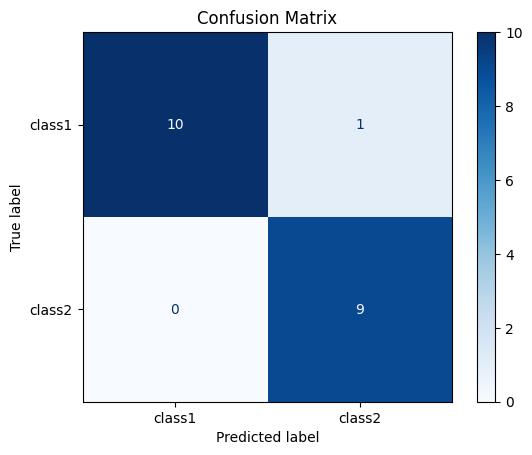

In [ ]:
#*****************************************************************************************************************************
#*****************************************************************************************************************************
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt

# Get predictions for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
display_labels = [f"class{i+1}" for i in unique_labels(y_test, y_pred_classes)]

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#*****************************************************************************************************************************
#*****************************************************************************************************************************
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print(f"Precision (weighted): {precision:.2f}")
print(f"Recall (weighted): {recall:.2f}")
print(f"F1 Score (weighted): {f1:.2f}")

Precision (weighted): 0.96
Recall (weighted): 0.95
F1 Score (weighted): 0.95


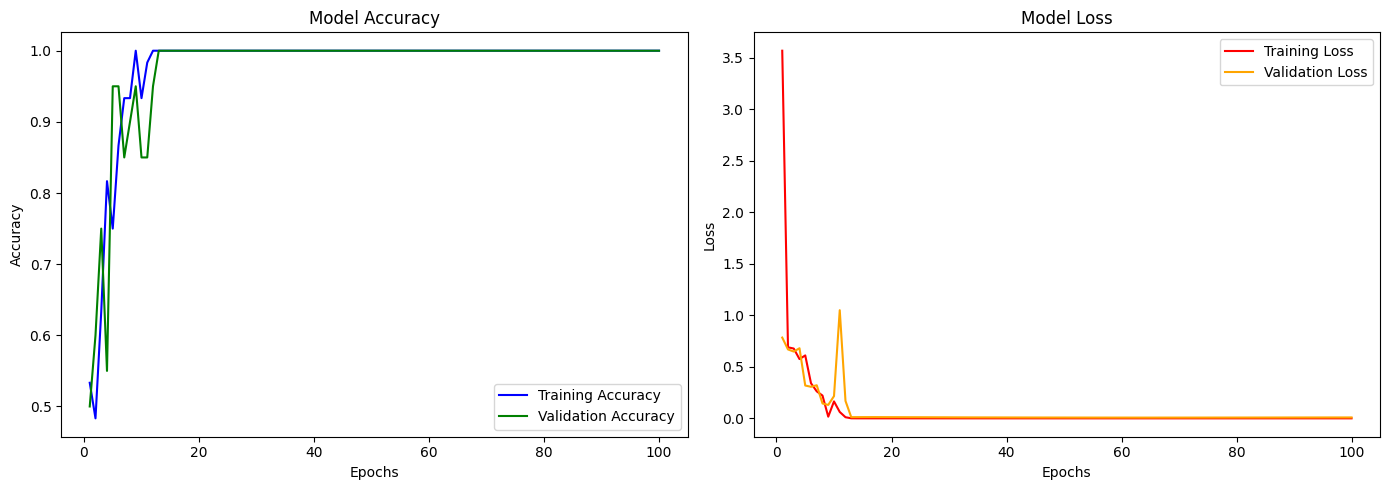

In [ ]:
#*****************************************************************************************************************************
#*****************************************************************************************************************************
import matplotlib.pyplot as plt

# Plotting accuracy and loss
def plot_model_performance(history):
    """Plot training and validation accuracy/loss over epochs."""
    epochs = range(1, len(history.history['accuracy']) + 1)

    plt.figure(figsize=(14, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'], label='Training Accuracy', color='blue')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy', color='green')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], label='Training Loss', color='red')
    plt.plot(epochs, history.history['val_loss'], label='Validation Loss', color='orange')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function
plot_model_performance(history)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


<Figure size 800x800 with 0 Axes>

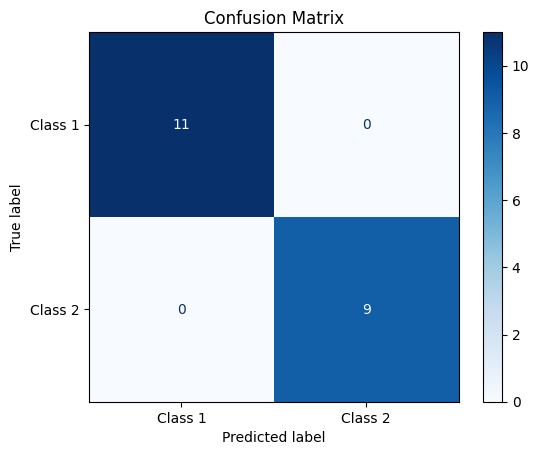


✅ Classification Report:
              precision    recall  f1-score   support

     Class 1       1.00      1.00      1.00        11
     Class 2       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np

# Get predictions
y_pred = np.argmax(model.predict(X_test), axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[f'Class {i+1}' for i in range(len(np.unique(y_test)))])
plt.figure(figsize=(8, 8))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Classification report
print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred, target_names=[f'Class {i+1}' for i in range(len(np.unique(y_test)))]))


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import os
from sklearn.model_selection import train_test_split

# Path to the dataset root folder containing subfolders "class1", ..., "class8"
dataset_path = "D:\OneDrive\Desktop\HSI\Grape_HSI\Dataset\Cropped Images\Augmented"

# Image dimensions and number of bands in each hyperspectral image
img_height, img_width = 128, 128  # Adjust based on your dataset
num_bands = 204  # Adjust according to the number of spectral bands in your HSI data

# Batch size and number of classes
batch_size = 4
num_classes = 2

# Load and preprocess the dataset
def load_hsi_images(path, img_height, img_width, num_bands):
    images, labels = [], []

    for class_idx in range(1, num_classes + 1):
        class_folder = os.path.join(path, f"class{class_idx}")

        for img_file in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_file)
            image = np.load(img_path)  # Assuming each HSI is stored as a .npy file

            # Resize and add to lists
            image_resized = tf.image.resize(image, (img_height, img_width)).numpy()
            images.append(image_resized)
            labels.append(class_idx - 1)  # Class labels 0 through 7

    images = np.array(images)
    labels = np.array(labels)
    return images, labels

# Load the dataset
X, y = load_hsi_images(dataset_path, img_height, img_width, num_bands)

# Normalize and split the dataset
X = X / 255.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, num_bands)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=batch_size, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import os
from sklearn.model_selection import train_test_split

# Path to the dataset root folder containing subfolders "class1", ..., "class8"
dataset_path = "D:\OneDrive\Desktop\HSI\Grape_HSI\Dataset\Grape_Train\Augmented"

# Image dimensions and number of bands in each hyperspectral image
img_height, img_width = 128, 128  # Adjust based on your dataset
num_bands = 204  # Adjust according to the number of spectral bands in your HSI data

# Batch size and number of classes
batch_size = 4
num_classes = 2

# Load and preprocess the dataset
def load_hsi_images(path, img_height, img_width, num_bands):
    images, labels = [], []

    for class_idx in range(1, num_classes + 1):
        class_folder = os.path.join(path, f"class{class_idx}")

        for img_file in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_file)
            image = np.load(img_path)  # Assuming each HSI is stored as a .npy file

            # Resize and add to lists
            image_resized = tf.image.resize(image, (img_height, img_width)).numpy()
            images.append(image_resized)
            labels.append(class_idx - 1)  # Class labels 0 through 7

    images = np.array(images)
    labels = np.array(labels)
    return images, labels

# Load the dataset
X, y = load_hsi_images(dataset_path, img_height, img_width, num_bands)

# Normalize and split the dataset
X = X / 255.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, num_bands)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=batch_size, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")

<>:8: SyntaxWarning: invalid escape sequence '\O'
<>:8: SyntaxWarning: invalid escape sequence '\O'
C:\Users\dell\AppData\Local\Temp\ipykernel_16288\303449170.py:8: SyntaxWarning: invalid escape sequence '\O'
  dataset_path = "D:\OneDrive\Desktop\HSI\Grape_HSI\Dataset\Grape_Train\Augmented"
C:\Users\dell\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 390ms/step - accuracy: 0.5705 - loss: 2.9510 - val_accuracy: 0.4286 - val_loss: 0.7324
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 167ms/step - accuracy: 0.5695 - loss: 0.7053 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step - accuracy: 0.5246 - loss: 0.6937 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - accuracy: 0.5314 - loss: 0.6927 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - accuracy: 0.5541 - loss: 0.6917 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - accuracy: 0.5237 - loss: 0.6928 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - accuracy: 0.4653 - loss: 0.6939 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - accuracy: 0.3807 - loss: 0.6939 - val_accu

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import os
from sklearn.model_selection import train_test_split

# Path to the dataset root folder containing subfolders "class1", ..., "class8"
dataset_path = "D:\OneDrive\Desktop\HSI\Grape_HSI\Dataset\Grape_Train\Augmented"

# Image dimensions and number of bands in each hyperspectral image
img_height, img_width = 128, 128  # Adjust based on your dataset
num_bands = 204  # Adjust according to the number of spectral bands in your HSI data

# Batch size and number of classes
batch_size = 4
num_classes = 2

# Load and preprocess the dataset
def load_hsi_images(path, img_height, img_width, num_bands):
    images, labels = [], []

    for class_idx in range(1, num_classes + 1):
        class_folder = os.path.join(path, f"class{class_idx}")

        for img_file in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_file)
            image = np.load(img_path)  # Assuming each HSI is stored as a .npy file

            # Resize and add to lists
            image_resized = tf.image.resize(image, (img_height, img_width)).numpy()
            images.append(image_resized)
            labels.append(class_idx - 1)  # Class labels 0 through 7

    images = np.array(images)
    labels = np.array(labels)
    return images, labels

# Load the dataset
X, y = load_hsi_images(dataset_path, img_height, img_width, num_bands)

# Normalize and split the dataset
X = X / 255.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, num_bands)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=150, batch_size=batch_size, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")

<>:8: SyntaxWarning: invalid escape sequence '\O'
<>:8: SyntaxWarning: invalid escape sequence '\O'
C:\Users\dell\AppData\Local\Temp\ipykernel_16288\3484089098.py:8: SyntaxWarning: invalid escape sequence '\O'
  dataset_path = "D:\OneDrive\Desktop\HSI\Grape_HSI\Dataset\Grape_Train\Augmented"


Epoch 1/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 235ms/step - accuracy: 0.5532 - loss: 7.7662 - val_accuracy: 0.4286 - val_loss: 0.7942
Epoch 2/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 213ms/step - accuracy: 0.5814 - loss: 0.7806 - val_accuracy: 0.5357 - val_loss: 0.6939
Epoch 3/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step - accuracy: 0.6074 - loss: 0.6848 - val_accuracy: 0.6429 - val_loss: 0.6747
Epoch 4/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 169ms/step - accuracy: 0.7812 - loss: 0.6273 - val_accuracy: 0.5000 - val_loss: 0.6978
Epoch 5/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - accuracy: 0.4931 - loss: 0.6939 - val_accuracy: 0.5000 - val_loss: 0.6936
Epoch 6/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - accuracy: 0.5586 - loss: 0.6900 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 7/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - accuracy: 0.4277 - loss: 0.6956 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 8/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step - accuracy: 0.5763 - loss: 0.6921 - val_accu

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import os
from sklearn.model_selection import train_test_split

# Path to the dataset root folder containing subfolders "class1", ..., "class8"
dataset_path = "D:\OneDrive\Desktop\HSI\Grape_HSI\Dataset\Grape_Train\Augmented"

# Image dimensions and number of bands in each hyperspectral image
img_height, img_width = 128, 128  # Adjust based on your dataset
num_bands = 204  # Adjust according to the number of spectral bands in your HSI data

# Batch size and number of classes
batch_size = 4
num_classes = 2

# Load and preprocess the dataset
def load_hsi_images(path, img_height, img_width, num_bands):
    images, labels = [], []

    for class_idx in range(1, num_classes + 1):
        class_folder = os.path.join(path, f"class{class_idx}")

        for img_file in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_file)
            image = np.load(img_path)  # Assuming each HSI is stored as a .npy file

            # Resize and add to lists
            image_resized = tf.image.resize(image, (img_height, img_width)).numpy()
            images.append(image_resized)
            labels.append(class_idx - 1)  # Class labels 0 through 7

    images = np.array(images)
    labels = np.array(labels)
    return images, labels

# Load the dataset
X, y = load_hsi_images(dataset_path, img_height, img_width, num_bands)

# Normalize and split the dataset
X = X / 255.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, num_bands)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=batch_size, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")

<>:8: SyntaxWarning: invalid escape sequence '\O'
<>:8: SyntaxWarning: invalid escape sequence '\O'
C:\Users\dell\AppData\Local\Temp\ipykernel_16288\828294663.py:8: SyntaxWarning: invalid escape sequence '\O'
  dataset_path = "D:\OneDrive\Desktop\HSI\Grape_HSI\Dataset\Grape_Train\Augmented"


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 272ms/step - accuracy: 0.4612 - loss: 5.6713 - val_accuracy: 0.4000 - val_loss: 0.7659
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 207ms/step - accuracy: 0.5340 - loss: 0.7350 - val_accuracy: 0.4500 - val_loss: 0.7027
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - accuracy: 0.6680 - loss: 0.6821 - val_accuracy: 0.5500 - val_loss: 0.6892
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 178ms/step - accuracy: 0.5929 - loss: 0.6464 - val_accuracy: 0.4000 - val_loss: 0.7601
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - accuracy: 0.6793 - loss: 0.6351 - val_accuracy: 0.6000 - val_loss: 0.7042
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - accuracy: 0.6875 - loss: 0.6445 - val_accuracy: 0.7000 - val_loss: 0.6710
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - accuracy: 0.7980 - loss: 0.4987 - val_accuracy: 0.6000 - val_loss: 0.7133
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step - accuracy: 0.7876 - loss: 0.4329 - val_accu

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import os
from sklearn.model_selection import train_test_split

# Path to the dataset root folder containing subfolders "class1", ..., "class8"
dataset_path = "D:\OneDrive\Desktop\HSI\Grape_HSI\Dataset\Grape_Train\Augmented"

# Image dimensions and number of bands in each hyperspectral image
img_height, img_width = 128, 128  # Adjust based on your dataset
num_bands = 204  # Adjust according to the number of spectral bands in your HSI data

# Batch size and number of classes
batch_size = 4
num_classes = 2

# Load and preprocess the dataset
def load_hsi_images(path, img_height, img_width, num_bands):
    images, labels = [], []

    for class_idx in range(1, num_classes + 1):
        class_folder = os.path.join(path, f"class{class_idx}")

        for img_file in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_file)
            image = np.load(img_path)  # Assuming each HSI is stored as a .npy file

            # Resize and add to lists
            image_resized = tf.image.resize(image, (img_height, img_width)).numpy()
            images.append(image_resized)
            labels.append(class_idx - 1)  # Class labels 0 through 7

    images = np.array(images)
    labels = np.array(labels)
    return images, labels

# Load the dataset
X, y = load_hsi_images(dataset_path, img_height, img_width, num_bands)

# Normalize and split the dataset
X = X / 255.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, num_bands)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=batch_size, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")

<>:8: SyntaxWarning: invalid escape sequence '\O'
<>:8: SyntaxWarning: invalid escape sequence '\O'
C:\Users\dell\AppData\Local\Temp\ipykernel_16288\227394437.py:8: SyntaxWarning: invalid escape sequence '\O'
  dataset_path = "D:\OneDrive\Desktop\HSI\Grape_HSI\Dataset\Grape_Train\Augmented"


Epoch 1/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 240ms/step - accuracy: 0.5728 - loss: 13.5137 - val_accuracy: 0.4500 - val_loss: 0.6941
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 248ms/step - accuracy: 0.5224 - loss: 0.6929 - val_accuracy: 0.4500 - val_loss: 0.6953
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - accuracy: 0.4205 - loss: 0.6967 - val_accuracy: 0.4500 - val_loss: 0.6944
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 182ms/step - accuracy: 0.4933 - loss: 0.6935 - val_accuracy: 0.4500 - val_loss: 0.6951
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 162ms/step - accuracy: 0.4873 - loss: 0.6939 - val_accuracy: 0.4500 - val_loss: 0.6955
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 169ms/step - accuracy: 0.5253 - loss: 0.6925 - val_accuracy: 0.4500 - val_loss: 0.6961
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - accuracy: 0.4950 - loss: 0.6939 - val_accuracy: 0.4500 - val_loss: 0.6967
Epoch 8/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step - accuracy: 0.3743 - loss: 0.7017 - val_acc

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import os
from sklearn.model_selection import train_test_split

# Path to the dataset root folder containing subfolders "class1", ..., "class8"
dataset_path = "D:\OneDrive\Desktop\HSI\Grape_HSI\Dataset\Grape_Train\Augmented"

# Image dimensions and number of bands in each hyperspectral image
img_height, img_width = 128, 128  # Adjust based on your dataset
num_bands = 204  # Adjust according to the number of spectral bands in your HSI data

# Batch size and number of classes
batch_size = 4
num_classes = 2

# Load and preprocess the dataset
def load_hsi_images(path, img_height, img_width, num_bands):
    images, labels = [], []

    for class_idx in range(1, num_classes + 1):
        class_folder = os.path.join(path, f"class{class_idx}")

        for img_file in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_file)
            image = np.load(img_path)  # Assuming each HSI is stored as a .npy file

            # Resize and add to lists
            image_resized = tf.image.resize(image, (img_height, img_width)).numpy()
            images.append(image_resized)
            labels.append(class_idx - 1)  # Class labels 0 through 7

    images = np.array(images)
    labels = np.array(labels)
    return images, labels

# Load the dataset
X, y = load_hsi_images(dataset_path, img_height, img_width, num_bands)

# Normalize and split the dataset
X = X / 255.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, num_bands)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=batch_size, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")

<>:8: SyntaxWarning: invalid escape sequence '\O'
<>:8: SyntaxWarning: invalid escape sequence '\O'
C:\Users\dell\AppData\Local\Temp\ipykernel_16288\828294663.py:8: SyntaxWarning: invalid escape sequence '\O'
  dataset_path = "D:\OneDrive\Desktop\HSI\Grape_HSI\Dataset\Grape_Train\Augmented"


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 267ms/step - accuracy: 0.6423 - loss: 4.5100 - val_accuracy: 0.5000 - val_loss: 0.7844
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 200ms/step - accuracy: 0.6154 - loss: 0.6249 - val_accuracy: 0.6000 - val_loss: 0.6691
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - accuracy: 0.5412 - loss: 0.6802 - val_accuracy: 0.7500 - val_loss: 0.6484
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 170ms/step - accuracy: 0.8363 - loss: 0.5752 - val_accuracy: 0.5500 - val_loss: 0.6807
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 160ms/step - accuracy: 0.6505 - loss: 0.6288 - val_accuracy: 0.9500 - val_loss: 0.3187
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 156ms/step - accuracy: 0.9025 - loss: 0.2743 - val_accuracy: 0.9500 - val_loss: 0.3064
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step - accuracy: 0.9108 - loss: 0.2733 - val_accuracy: 0.8500 - val_loss: 0.3213
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - accuracy: 0.9741 - loss: 0.1432 - val_accu